In [1]:
%matplotlib inline

# Properties

Compute some network properties for the lollipop graph.


source vertex {target:length, }
0 {0: 0, 1: 1, 2: 1, 3: 1, 4: 2, 5: 3, 6: 4, 7: 5, 8: 6, 9: 7} 
1 {1: 0, 0: 1, 2: 1, 3: 1, 4: 2, 5: 3, 6: 4, 7: 5, 8: 6, 9: 7} 
2 {2: 0, 0: 1, 1: 1, 3: 1, 4: 2, 5: 3, 6: 4, 7: 5, 8: 6, 9: 7} 
3 {3: 0, 0: 1, 1: 1, 2: 1, 4: 1, 5: 2, 6: 3, 7: 4, 8: 5, 9: 6} 
4 {4: 0, 3: 1, 5: 1, 0: 2, 1: 2, 2: 2, 6: 2, 7: 3, 8: 4, 9: 5} 
5 {5: 0, 4: 1, 6: 1, 3: 2, 7: 2, 0: 3, 1: 3, 2: 3, 8: 3, 9: 4} 
6 {6: 0, 5: 1, 7: 1, 8: 2, 4: 2, 9: 3, 3: 3, 0: 4, 1: 4, 2: 4} 
7 {7: 0, 8: 1, 6: 1, 9: 2, 5: 2, 4: 3, 3: 4, 0: 5, 1: 5, 2: 5} 
8 {8: 0, 9: 1, 7: 1, 6: 2, 5: 3, 4: 4, 3: 5, 0: 6, 1: 6, 2: 6} 
9 {9: 0, 8: 1, 7: 2, 6: 3, 5: 4, 4: 5, 3: 6, 0: 7, 1: 7, 2: 7} 

average shortest path length 2.86

length #paths
0 10
1 24
2 16
3 14
4 12
5 10
6 8
7 6
radius: 4
diameter: 7
eccentricity: {0: 7, 1: 7, 2: 7, 3: 6, 4: 5, 5: 4, 6: 4, 7: 5, 8: 6, 9: 7}
center: [5, 6]
periphery: [0, 1, 2, 9]
density: 0.26666666666666666


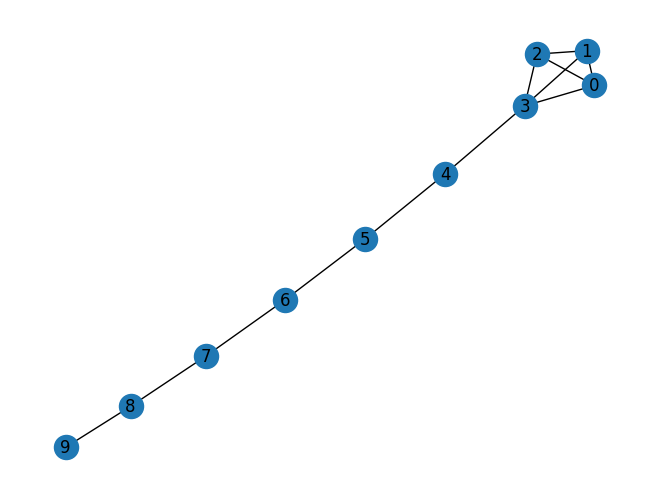

In [2]:
import matplotlib.pyplot as plt
import networkx as nx

G = nx.lollipop_graph(4, 6)

pathlengths = []

print("source vertex {target:length, }")
for v in G.nodes():
    spl = dict(nx.single_source_shortest_path_length(G, v))
    print(f"{v} {spl} ")
    for p in spl:
        pathlengths.append(spl[p])

print()
print(f"average shortest path length {sum(pathlengths) / len(pathlengths)}")

# histogram of path lengths
dist = {}
for p in pathlengths:
    if p in dist:
        dist[p] += 1
    else:
        dist[p] = 1

print()
print("length #paths")
verts = dist.keys()
for d in sorted(verts):
    print(f"{d} {dist[d]}")

print(f"radius: {nx.radius(G)}")
print(f"diameter: {nx.diameter(G)}")
print(f"eccentricity: {nx.eccentricity(G)}")
print(f"center: {nx.center(G)}")
print(f"periphery: {nx.periphery(G)}")
print(f"density: {nx.density(G)}")

pos = nx.spring_layout(G, seed=3068)  # Seed layout for reproducibility
nx.draw(G, pos=pos, with_labels=True)
plt.show()


(0, 0) (1, 0) (0, 1)
(0, 1) (1, 1) (0, 2)
(0, 2) (1, 2) (0, 3)
(0, 3) (1, 3) (0, 4)
(0, 4) (1, 4)
(1, 0) (2, 0) (1, 1)
(1, 1) (2, 1) (1, 2)
(1, 2) (2, 2) (1, 3)
(1, 3) (2, 3) (1, 4)
(1, 4) (2, 4)
(2, 0) (3, 0) (2, 1)
(2, 1) (3, 1) (2, 2)
(2, 2) (3, 2) (2, 3)
(2, 3) (3, 3) (2, 4)
(2, 4) (3, 4)
(3, 0) (4, 0) (3, 1)
(3, 1) (4, 1) (3, 2)
(3, 2) (4, 2) (3, 3)
(3, 3) (4, 3) (3, 4)
(3, 4) (4, 4)
(4, 0) (4, 1)
(4, 1) (4, 2)
(4, 2) (4, 3)
(4, 3) (4, 4)
(4, 4)


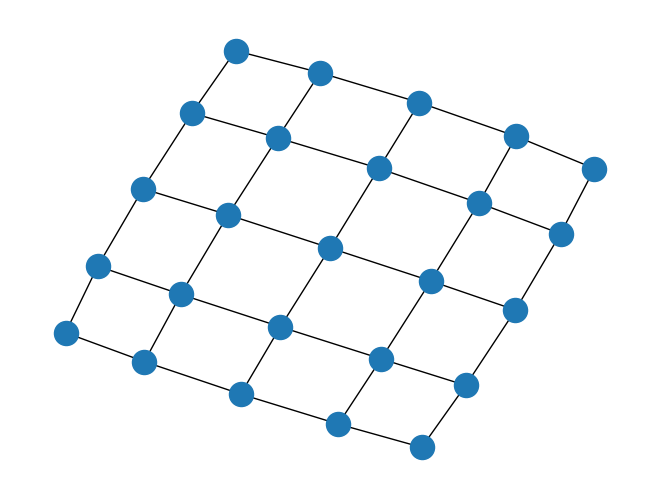

In [3]:
import matplotlib.pyplot as plt
import networkx as nx

G = nx.grid_2d_graph(5, 5)  # 5x5 grid

# print the adjacency list
for line in nx.generate_adjlist(G):
    print(line)
# write edgelist to grid.edgelist
nx.write_edgelist(G, path="grid.edgelist", delimiter=":")
# read edgelist from grid.edgelist
H = nx.read_edgelist(path="grid.edgelist", delimiter=":")

pos = nx.spring_layout(H, seed=200)
nx.draw(H, pos)
plt.show()


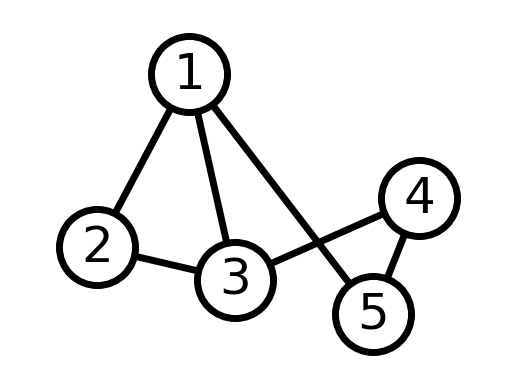

In [4]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.Graph()
G.add_edge(1, 2)
G.add_edge(1, 3)
G.add_edge(1, 5)
G.add_edge(2, 3)
G.add_edge(3, 4)
G.add_edge(4, 5)

# explicitly set positions
pos = {1: (1, 1), 2: (-1, 0.3), 3: (2, 0.17), 4: (6, 0.500), 5: (5, 0.03)}

options = {
    "font_size": 36,
    "node_size": 3000,
    "node_color": "white",
    "edgecolors": "black",
    "linewidths": 5,
    "width": 5,
}
nx.draw_networkx(G, pos, **options)

# Set margins for the axes so that nodes aren't clipped
ax = plt.gca()
ax.margins(0.20)
plt.axis("off")
plt.show()
